# PHYS 404/604: Computational Techniques in Physics

Spring 2018, Lecture 21

Wednesday, April 18, 2:30pm&mdash;3:45pm

Instructor: Chao-Chin Yang

Office: BPB-241

Email: [ccyang@unlv.edu](mailto:ccyang@unlv.edu)

## Least Squares Fitting

### Radioactive Decay

As an example of how to conduct a straight-line fit, we consider some data from radioactive decay.
From theoretical considerations, the expected number of decays that occur in a given time interval follows
\begin{equation}
N = N_0 \exp(-t / \tau).
\end{equation}
The experiment gives the following data.

In [5]:
import numpy as np

# time points in microseconds
t = np.array([10, 20, 30, 40, 50, 60, 80, 100])

# number of observed decays per microsecond
n = np.array([6331, 4069, 2592, 1580, 1018, 622, 235, 109])

We want to use this data to estimate the lifetime for the radioactive source $\tau$.
To make the fitting more meaningful, we need to know the uncertainties $\sigma_i$.
*What should be those?*

In [6]:
# COMPLETE ME: uncertainty at each measurement
#dn = ?

So, the data should look like this.

NameError: name 'dn' is not defined

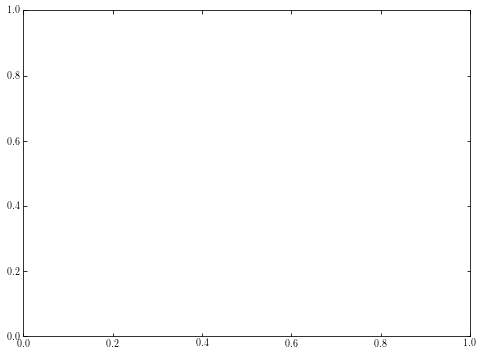

In [7]:
import matplotlib.pyplot as plt

# Initiate the plot
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

# Plot the data along with the uncertainties.
ax.errorbar(t, n, yerr=dn, fmt='o', capsize=4)

# Fine tune the plot.
ax.grid()
ax.minorticks_on()
ax.set_xlabel(r"$t$ [$\mu$s]")
ax.set_ylabel(r"$N(t)$ [$\mu$s$^{-1}$]")

plt.show()

Now, to cast the problem into a straight-line fitting, we work in the logarithmic space:

\begin{equation}
\ln N = \ln N_0 - \frac{t}{\tau}.
\end{equation}

So for a straight line $y = a + b x$, we identify $y \equiv \ln N$, $x \equiv t$, $a \equiv \ln N_0$, and $b \equiv -1 / \tau$. 

In [ ]:
xi = t
yi = np.log(n)

*How about the uncentainties??*

In [ ]:
# COMPLETE ME: set the uncertainties for yi.
#sigma = ?

Here is the function to find the intercept $a$ and the slope $b$:

In [ ]:
def line_fit(xi, yi, sigma):
    s2 = 1 / sigma**2
    w1 = np.sum(s2)
    wx = np.sum(xi * s2)
    wy = np.sum(yi * s2)
    wxy = np.sum(xi * yi * s2)
    wx2 = np.sum(xi * xi * s2)
    norm = w1 * wx2 - wx * wx
    a = (wx2 * wy - wx * wxy) / norm
    b = (w1 * wxy - wx * wy) / norm
    return a, b

We can now find the best fitting parameters:

In [ ]:
a, b = line_fit(xi, yi, sigma)

print("a = ", a)
print("b = ", b)

which translates to

In [ ]:
import math

n0, tau = math.exp(a), -1 / b

print("N0 = ", n0)
print("tau = ", tau)

Make a habit to *always* check if your results make sense by plotting the fit on top of the data:

In [ ]:
# Initiate the plot
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

# Plot the data along with the uncertainties.
ax.errorbar(t, n, yerr=dn, fmt='o', capsize=4, label="data")

# Overplot the fit.
tf = np.linspace(0, 100, 201)
nf = n0 * np.exp(-tf / tau)
ax.plot(tf, nf, label="fit")

# Fine tune the plot.
ax.grid()
ax.minorticks_on()
ax.set_xlabel(r"$t$ [$\mu$s]")
ax.set_ylabel(r"$N(t)$ [$\mu$s$^{-1}$]")
ax.legend()

plt.show()

Finally, *how good is the fit?* To see this, we need to calculate $S_{\min}$.

In [ ]:
smin = np.sum(((a + b * xi - yi) / sigma)**2)
print("S_min = ", smin)

Is the fit good?

**Further reading:** Lyons, L. 1991, *A Practical Guide to Data Analysis for Physical Science Students* (Cambridge, U.K.: Cambridge Univ. Press)

### Hubble's Law

Edwin Hubble's seminal *two-page* [paper](https://doi.org/10.1073/pnas.15.3.168) in 1929 established that the universe is expanding.  He "found" a linear relationship between the radial velocity $v_r$ (in km/s) and the distance $r$ (in $10^6$ parsecs) of distant objects.  Now, try to trace his footsteps and judge if his *hypothesis* would make sense. This is also a chance for you to find your own *Hubble constant* $H_0$ (in km/s/Mpc).

In [ ]:
# Hubble's data:
r = [0.032, 0.034, 0.214, 0.263, 0.275, 0.275, 0.45, 0.5, 0.5, 0.63,
     0.8, 0.9, 0.9, 0.9, 0.9, 1.0, 1.1, 1.1, 1.4, 1.7, 2.0, 2.0,
     2.0, 2.0]
vr = [170, 290, -130, -70, -185, -220, 200, 290, 270, 200, 300, -30,
      650, 150, 500, 920, 450, 500, 500, 960, 500, 850, 800, 1090]
r = np.array(r)
vr = np.array(vr)

# COMPLETE ME: Find the Hubble constant.
#h0 = ?
#print("h0 = ", h0)

# Initiate the plot
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

# Plot the data.
ax.plot(r, vr, 'o', label="Hubble's data")

# COMPLETEME: Plot the fit.
rf = np.linspace(0, 2.25, 226)
#vrf = ?
ax.plot(rf, vrf, '--', label="Hubble's law")

# Fine tune the plot.
ax.grid()
ax.minorticks_on()
ax.set_xlabel(r"Distance $r$ [Mpc]")
ax.set_ylabel(r"Radial Velocity $v_r$ [km/s]")
ax.legend()

plt.show()